# Real Heart Attack Data Exploration

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy import stats
%matplotlib inline



C:\Users\Oormi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/Medicaldataset_backup.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
# Check data types
df_heart.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [5]:
# Check for null values
df_heart.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [10]:
# Define target vector
y = df_heart["Result"]
y[:5]

0    negative
1    positive
2    negative
3    positive
4    negative
Name: Result, dtype: object

In [61]:
# Convert cetegorical to binary variable
y = pd.get_dummies(y, prefix='Result', drop_first=True)
y = y['Result_positive']
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: Result_positive, dtype: uint8

In [46]:
# Define features set
X = df_heart.copy()

X.drop(["Result"], axis=1, inplace=True)
X.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003


In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)

In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting the Random Forest Model

In [16]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=75)

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\Oormi\AppData\Local\Temp\ipykernel_14508\478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


### Making Predictions Using the Random Forest Model

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,118,2
Actual 1,4,206


Confusion matrix Accuracy Score : 0.9818181818181818
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       120
           1       0.99      0.98      0.99       210

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



### Feature Importance

In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5935675774508986, 'Troponin'),
 (0.2565410656005502, 'CK-MB'),
 (0.04788733977266787, 'Age'),
 (0.026719847471245693, 'Blood sugar'),
 (0.02492009692657328, 'Systolic blood pressure'),
 (0.02214302155952961, 'Diastolic blood pressure'),
 (0.02058847327295095, 'Heart rate'),
 (0.007632577945583779, 'Gender')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

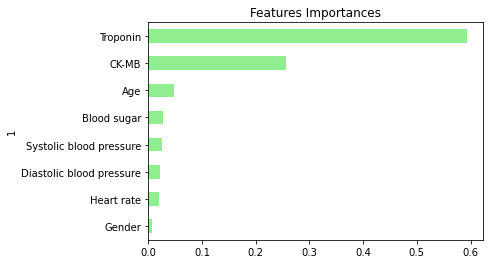

In [22]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Random forest without troponin

In [37]:
# Copy the same features dataframe and drop the tropinin column
# How does the model perform without the troponin indicator?
X_noTroponin = X.copy()
X_noTroponin.drop(["Troponin"], axis=1, inplace=True)
X_noTroponin.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB
0,64,1,66,160,83,160,1
1,21,1,94,98,46,296,6
2,55,1,64,160,77,270,1
3,64,1,70,120,55,270,13
4,55,1,64,112,65,300,1


In [39]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_noTroponin, y, random_state=3000)
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=75)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

C:\Users\Oormi\AppData\Local\Temp\ipykernel_14508\1993540184.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,74,46
Actual 1,48,162


Confusion matrix Accuracy Score : 0.7151515151515152
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       120
           1       0.78      0.77      0.78       210

    accuracy                           0.72       330
   macro avg       0.69      0.69      0.69       330
weighted avg       0.72      0.72      0.72       330



## Calculate Point-Biserial Correlation between Troponin and Heart Attack

In [62]:
x = X['Troponin']
stats.pointbiserialr(y, x)

PointbiserialrResult(correlation=0.22937630511968993, pvalue=3.303208528079162e-17)

The point-biserial correlation coefficient is 0.22937 (positive; good) and the corresponding p-value is 3.30321 (not significant)

## Deep learning model

In [23]:
# Import dependencies and determine the number of unique values in each column
import tensorflow as tf
X.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
dtype: int64

In [47]:
# Convert float numbers to int to reduce number of unique values
X['Blood sugar'] = X['Blood sugar'].astype(int)
X['CK-MB'] = X['CK-MB'].astype(int)
X.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 243
CK-MB                        94
Troponin                    352
dtype: int64

In [63]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                144       
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 0.7582 - accuracy: 0.4115
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5763
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6714
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.6835
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6886
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.6967
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7037
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5546 - accuracy: 0.7098
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7219
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7371
Epoch 11/

31/31 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.8716
Epoch 84/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8746
Epoch 85/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.8564
Epoch 86/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.8534
Epoch 87/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8716
Epoch 88/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8675
Epoch 89/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.8726
Epoch 90/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8686
Epoch 91/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8736
Epoch 92/100
31/31 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8716
Epoch 93/100


In [68]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.8047 - accuracy: 0.8364 - 116ms/epoch - 11ms/step
Loss: 0.8047412037849426, Accuracy: 0.8363636136054993


### Deep learning without troponin

In [69]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_noTroponin, y, random_state=3000)
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [72]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=7))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                128       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 0.6756 - accuracy: 0.5996
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6259
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.6360
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6350
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6522
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6552
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6552
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.6663
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6663
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6714
Epoch 11/

31/31 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7442
Epoch 84/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7401
Epoch 85/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7492
Epoch 86/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7513
Epoch 87/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7482
Epoch 88/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7381
Epoch 89/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7482
Epoch 90/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7503
Epoch 91/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7422
Epoch 92/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7503
Epoch 93/100


In [74]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.5257 - accuracy: 0.7303 - 125ms/epoch - 11ms/step
Loss: 0.5257161259651184, Accuracy: 0.7303030490875244
